<a href="https://www.kaggle.com/code/angelahenrietlim/givemesomecredit-ahl?scriptVersionId=115983649" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


# 1. Exploratory Data Analysis

In [73]:
#import module
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_auc_score, confusion_matrix, auc
from sklearn.metrics import roc_auc_score, precision_recall_curve,roc_curve

In [ ]:
#import dataset
train_df = pd.read_csv("../input/GiveMeSomeCredit/cs-training.csv")
test_df = pd.read_csv("../input/GiveMeSomeCredit/cs-test.csv")
combine = [train_df, test_df]

In [75]:
train_df.shape

(150000, 12)

In [76]:
test_df.shape

(101503, 12)

In [77]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 2. Feature Engineering

**Dataset Features Introduction**

**feature type**

* Nominal attributes:
* * Binary Attribute: SeriousDlqin2yrs
* Value attribute:
* * Continuous features are:
* * RevolvingUtilizationOfUnsecuredLines
* * Monthly Income
* * DebtRatio
* Discrete features are:
* * age
* * NumberOfTime30-59DaysPastDueNotWorse
* * NumberOfTimes90DaysLate
* * NumberOfTime60-89DaysPastDueNotWorse
* * NumberOfOpenCreditLinesAndLoans
* * NumberRealEstateLoansOrLines
* * NumberOfDependents

In [78]:
train_df.info()
print('_'*64)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

**Missing Value**

* Training set
* * Monthly Income (19.82%)
* * Number Of Dependents (2.62%)
* Test set
* * Monthly Income (19.81%)
* * Number Of Dependents (2.59%)

In [79]:
pd.DataFrame({"Number of Null Values":train_df.isnull().sum(),
             "Ratio":round(train_df.isnull().sum()/len(train_df)*100,2)})

,Number of Null Values,Ratio
Unnamed: 0,0,0.00
SeriousDlqin2yrs,0,0.00
RevolvingUtilizationOfUnsecuredLines,0,0.00
age,0,0.00
NumberOfTime30-59DaysPastDueNotWorse,0,0.00
DebtRatio,0,0.00
MonthlyIncome,29731,19.82
NumberOfOpenCreditLinesAndLoans,0,0.00
NumberOfTimes90DaysLate,0,0.00
NumberRealEstateLoansOrLines,0,0.00


In [80]:
pd.DataFrame({"Number of Null Values":test_df.isna().sum(),
             "Ratio":round(test_df.isnull().sum()/len(test_df)*100,2)})

,Number of Null Values,Ratio
Unnamed: 0,0,0.00
SeriousDlqin2yrs,101503,100.00
RevolvingUtilizationOfUnsecuredLines,0,0.00
age,0,0.00
NumberOfTime30-59DaysPastDueNotWorse,0,0.00
DebtRatio,0,0.00
MonthlyIncome,20103,19.81
NumberOfOpenCreditLinesAndLoans,0,0.00
NumberOfTimes90DaysLate,0,0.00
NumberRealEstateLoansOrLines,0,0.00


In [81]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers 

In [82]:
#Outlier detection for ten features: more than 3 sample anomalies will be classified as abnormal samples
Outliers_to_drop = detect_outliers(train_df,3,train_df.columns.values[2:])
print("Outline：",round(len(Outliers_to_drop)/train_df.shape[0]*100,2),"%")
train_df.loc[Outliers_to_drop] # Show the outliers rows

Outline： 0.35 %


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
919,920,1,1.362142,73,1,274.000000,NaN,2,3,0,1,NaN
1958,1959,0,1.634551,28,0,151.000000,NaN,1,3,0,2,0.0
5956,5957,0,2.237856,60,6,2597.000000,1.0,16,1,2,1,4.0
8791,8792,1,2.039867,43,3,0.351430,2412.0,6,6,0,1,2.0
9341,9342,0,1.376623,29,1,0.417025,1162.0,4,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149206,149207,0,0.465183,51,3,2824.000000,NaN,7,2,1,4,0.0
149439,149440,1,1.000000,34,98,9.000000,NaN,0,98,0,98,0.0
149794,149795,1,1.000000,44,3,2826.000000,NaN,8,3,1,1,0.0
119477,119478,0,0.091660,66,0,3389.000000,NaN,21,0,6,1,1.0


In [83]:
train_df.duplicated().value_counts()

False    150000
dtype: int64

In [84]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Customer default rate: 6.683999999999999%


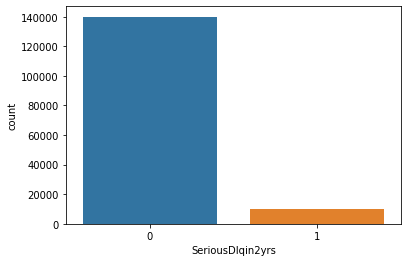

In [85]:
sns.countplot(x="SeriousDlqin2yrs", data=train_df)
print("Customer default rate: {}%".format(train_df["SeriousDlqin2yrs"].sum() / len(train_df)*100))

**Whether the feature has a large number of duplicate values**

Most of the features are repeated value 0:
* NumberOfTime60-89DaysPastDueNotWorse(94.93%)
* NumberOfTimes90DaysLate (94.44%)
* SeriousDlqin2yrs (93.32%)
* NumberOfTime30-59DaysPastDueNotWorse(84.01%)
* Number Of Dependents (60.55%)

In [86]:
features = train_df.columns.values
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train_df[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax(), round(values.max()/train_df.shape[0]*100,2)])

np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value', 'Ratio'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,10,8,1,4,11,9,7,2,5,3,6,0
Feature,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,SeriousDlqin2yrs,NumberOfTime30-59DaysPastDueNotWorse,NumberOfDependents,NumberRealEstateLoansOrLines,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,DebtRatio,age,MonthlyIncome,Unnamed: 0
Max duplicates,142396,141662,139974,126018,86902,56188,13614,10878,4113,3837,2757,1
Value,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,49.0,5000.0,1.0
Ratio,94.93,94.44,93.32,84.01,57.93,37.46,9.08,7.25,2.74,2.56,1.84,0.0


* RUUL

When the minimum value of RUUL is from 12 to 13, the default rate drops significantly. When the minimum value of RUUL reaches 12, the default rate of 6.667% is already lower than the overall default rate of 6.684%. It can be seen that the data with RUUL>=12 is abnormal.

In [87]:
'''default_prop = [] # 违约率
for i in range(int(train_df["RevolvingUtilizationOfUnsecuredLines"].max())):
    temp_ = train_df.loc[train_df["RevolvingUtilizationOfUnsecuredLines"] >= i]
    default_prop.append([i, temp_["SeriousDlqin2yrs"].mean()])
default_prop'''

'default_prop = [] # 违约率\nfor i in range(int(train_df["RevolvingUtilizationOfUnsecuredLines"].max())):\n    temp_ = train_df.loc[train_df["RevolvingUtilizationOfUnsecuredLines"] >= i]\n    default_prop.append([i, temp_["SeriousDlqin2yrs"].mean()])\ndefault_prop'

In [88]:
'''sns.lineplot(x=[i[0] for i in default_prop], y=[i[1] for i in default_prop])
plt.title("Proportion of Defaulters As Minimum RUUL Increases")'''

'sns.lineplot(x=[i[0] for i in default_prop], y=[i[1] for i in default_prop])\nplt.title("Proportion of Defaulters As Minimum RUUL Increases")'

* Age

* * There is 1 sample with age 0, which is obviously unreasonable, delete this sample later
* * Default customers tend to be younger

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

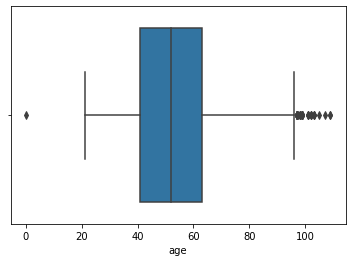

In [89]:
sns.boxplot(train_df['age'])

In [90]:
len(train_df.loc[train_df['age'] == 0])

1

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

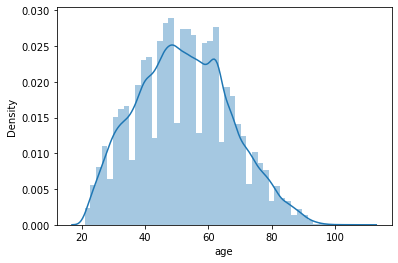

In [91]:
sns.distplot(train_df.loc[train_df['age'] > 0]["age"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SeriousDlqin2yrs = 0')

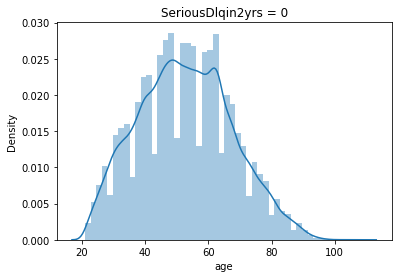

In [92]:
sns.distplot(train_df.loc[(train_df['age'] > 0)&(train_df["SeriousDlqin2yrs"] == 0)]["age"])
plt.title('SeriousDlqin2yrs = 0')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SeriousDlqin2yrs = 1')

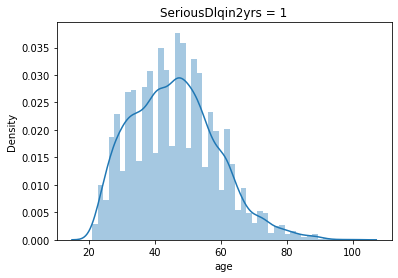

In [93]:
sns.distplot(train_df.loc[(train_df['age'] > 0)&(train_df["SeriousDlqin2yrs"] == 1)]["age"])
plt.title('SeriousDlqin2yrs = 1')

* Characteristics related to overdue times
* * NumberOfTime30-59DaysPastDueNotWorse
* * NumberOfTimes90DaysLate
* * NumberOfTime60-89DaysPastDueNotWorse

In [94]:
late_pay_cols = ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']

In [95]:
train_df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [96]:
train_df["NumberOfTimes90DaysLate"].value_counts().sort_index()

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [97]:
train_df["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [98]:
train_df.loc[train_df["NumberOfTimes90DaysLate"] > 17][late_pay_cols].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
count,269.000000,269.000000,269.000000
mean,97.962825,97.962825,97.962825
std,0.270628,0.270628,0.270628
min,96.000000,96.000000,96.000000
25%,98.000000,98.000000,98.000000
50%,98.000000,98.000000,98.000000
75%,98.000000,98.000000,98.000000
max,98.000000,98.000000,98.000000


In [99]:
distinct_triples_counts = dict()
for arr in train_df.loc[train_df["NumberOfTimes90DaysLate"] > 17][late_pay_cols].values:
    triple = ",".join(list(map(str, arr)))
    if triple not in distinct_triples_counts:
        distinct_triples_counts[triple] = 0
    else:
        distinct_triples_counts[triple] += 1
distinct_triples_counts

{'98,98,98': 263, '96,96,96': 4}

When NumberOfTimes90DaysLate>17, the values ​​of these three features are exactly the same, and there are only two cases (all 96 or all 98). After a simple calculation, it can be seen that the number of times a person overdue for more than 90 days within 2 years cannot be 96 or 98. These samples are obviously abnormal.

Therefore, consider removing samples with NumberOfTimes90DaysLate>17.

* Debt Ratio

In [100]:
train_df["DebtRatio"].quantile(0.765)

1.0

In [101]:
train_df["DebtRatio"].quantile(0.975)

3489.024999999994

In [102]:
train_df.loc[train_df["DebtRatio"] > train_df["DebtRatio"].quantile(0.975)][['DebtRatio','MonthlyIncome']].describe()

,DebtRatio,MonthlyIncome
count,3750.000000,185.000000
mean,5917.488000,0.064865
std,10925.524011,0.246956
min,3490.000000,0.000000
25%,3957.250000,0.000000
50%,4619.000000,0.000000
75%,5789.500000,0.000000
max,329664.000000,1.000000


In [103]:
train_df.loc[train_df["DebtRatio"] > train_df["DebtRatio"].quantile(0.975)]['MonthlyIncome'].value_counts()

0.0    173
1.0     12
Name: MonthlyIncome, dtype: int64

In [104]:
len(train_df[(train_df["DebtRatio"] > train_df["DebtRatio"].quantile(0.9)) & (train_df['SeriousDlqin2yrs'] == train_df['MonthlyIncome'])])

657

* Monthly income

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

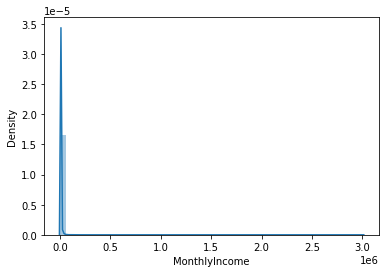

In [105]:
sns.distplot(train_df['MonthlyIncome'].dropna().loc[train_df['DebtRatio']<train_df['DebtRatio'].quantile(0.975)])

* NumberOfOpenCreditLinesAndLoans

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Density'>

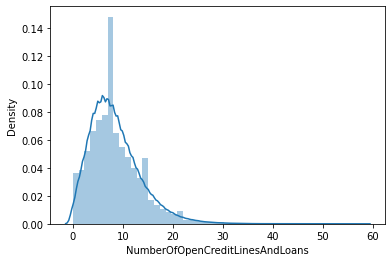

In [106]:
sns.distplot(train_df["NumberOfOpenCreditLinesAndLoans"])

In [107]:
train_df["NumberRealEstateLoansOrLines"].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
17        4
16        4
25        3
18        2
23        2
19        2
20        2
26        1
54        1
21        1
29        1
32        1
Name: NumberRealEstateLoansOrLines, dtype: int64

<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='count'>

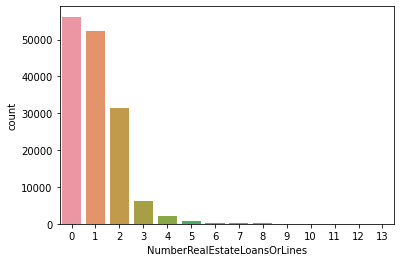

In [108]:
sns.countplot(x="NumberRealEstateLoansOrLines", data=train_df.loc[train_df["NumberRealEstateLoansOrLines"] <= 13])

In [109]:
train_df.loc[train_df["NumberRealEstateLoansOrLines"] > 13]["SeriousDlqin2yrs"].describe()

count    38.000000
mean      0.210526
std       0.413155
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: SeriousDlqin2yrs, dtype: float64

* Number of Dependents

In [110]:
train_df["NumberOfDependents"].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [111]:
train_df.loc[train_df["NumberOfDependents"] <= 10]["SeriousDlqin2yrs"].describe()

count    146074.000000
mean          0.067411
std           0.250733
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

<AxesSubplot:xlabel='NumberOfDependents', ylabel='count'>

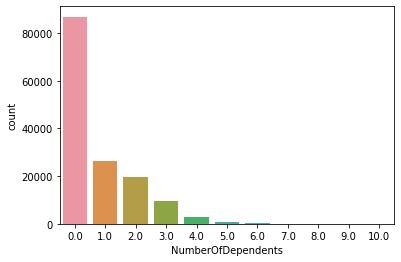

In [112]:
sns.countplot(x="NumberOfDependents", data=train_df.loc[train_df["NumberOfDependents"] <= 10])

# 3. Model Iteration

In [113]:
for df in combine:
    df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [114]:
for df in combine:
    df['NumberOfDependents'].fillna(0, inplace=True)

In [115]:
def randomforest_filled_func(df):
    
    train = df[df.MonthlyIncome.notnull()]
    test = df[df.MonthlyIncome.isnull()]
    
    train_x = train.iloc[:,2:].drop('MonthlyIncome',axis=1)
    train_y = train['MonthlyIncome']
    
    test_x = test.iloc[:,2:].drop('MonthlyIncome',axis=1)
    
    rfr = RandomForestRegressor(random_state=2021, n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(train_x, train_y)
    
    predicted = rfr.predict(test_x).round(0)
    print(predicted)
    
    df.loc[(df.MonthlyIncome.isnull()), 'MonthlyIncome'] = predicted
    return df

In [116]:
for df in combine:
    df = randomforest_filled_func(df)

[8337. 1134. 8337. ... 1134. 2467. 2467.]
[3379. 1818. 8336. ... 1818. 1818. 8336.]


In [117]:
train_df = train_df[train_df['age'] > 0]

In [118]:
train_df = train_df[train_df['RevolvingUtilizationOfUnsecuredLines'] < 13]

In [119]:
train_df = train_df[train_df['NumberOfTimes90DaysLate'] <= 17]

In [120]:
train_df = train_df.loc[train_df["DebtRatio"] <= train_df["DebtRatio"].quantile(0.975)]

In [121]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145754 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    145754 non-null  int64  
 1   SeriousDlqin2yrs                      145754 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  145754 non-null  float64
 3   age                                   145754 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  145754 non-null  int64  
 5   DebtRatio                             145754 non-null  float64
 6   MonthlyIncome                         145754 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       145754 non-null  int64  
 8   NumberOfTimes90DaysLate               145754 non-null  int64  
 9   NumberRealEstateLoansOrLines          145754 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  145754 non-null  int64  
 11  

In [122]:
train_df.duplicated().value_counts()

False    145754
dtype: int64

In [123]:
train_df = train_df.drop_duplicates()

In [124]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,'b',label= 'AUC= %0.3f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--') 
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
    plt.show()

In [125]:
x_train = train_df.iloc[:,2:]
y_train = train_df['SeriousDlqin2yrs'].astype('uint8')
train_X, test_X, train_y, test_y = train_test_split(x_train,y_train,test_size=.1,random_state=2021, stratify = y_train)

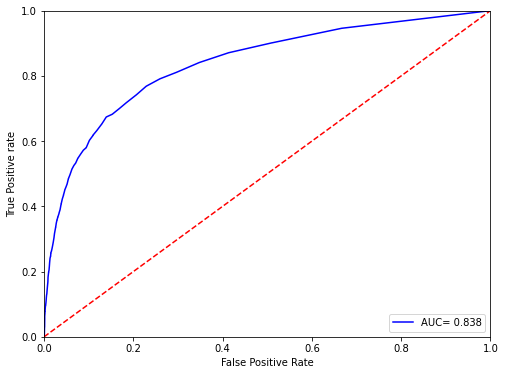

AUC Score : 0.8380636705842615


In [126]:
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(train_X,train_y)

pred = rfc.predict_proba(test_X)[:,1]
fpr, tpr, _ = roc_curve(test_y, pred) 
roc_auc = auc(fpr,tpr) 
plot_roc_curve(fpr,tpr)
print ('AUC Score :', roc_auc)

* LightGBM

AUC Score : 0.8690975480877382


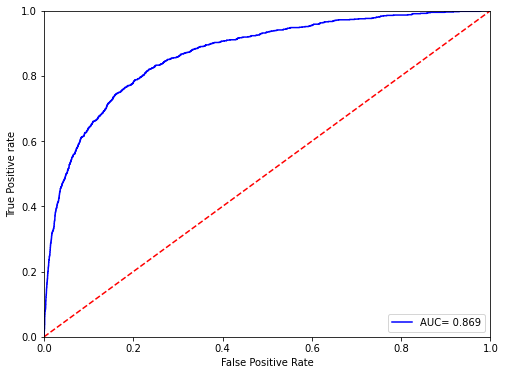

In [127]:
lgbm_clf = LGBMClassifier(is_unbalance = True) #使用默认参数
lgbm_clf.fit(train_X,train_y)
lgbm_clf_proba = lgbm_clf.predict_proba(test_X)[:,1]
fpr, tpr, _ = roc_curve(test_y, lgbm_clf_proba)
roc_auc = auc(fpr,tpr)
print ('AUC Score :', roc_auc)
plot_roc_curve(fpr,tpr)

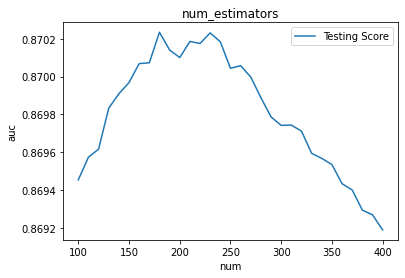

In [128]:
num_estimators = range(100,401,10)
train_scores = []
test_scores = []
for num_estimator in num_estimators:
    lgbm = LGBMClassifier(is_unbalance = True,num_leaves=60,learning_rate=0.02,n_estimators=num_estimator)
    lgbm.fit(train_X,train_y)
    pre_y1 = lgbm.predict_proba(train_X)[:,1]
    pre_y2 = lgbm.predict_proba(test_X)[:,1]
    train_scores.append(roc_auc_score(train_y, pre_y1))
    test_scores.append(roc_auc_score(test_y, pre_y2))

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(num_estimators,train_scores,label='Training Score')
ax.plot(num_estimators,test_scores,label='Testing Score')
ax.set_xlabel(r'num')
ax.set_ylabel(r'auc')
ax.set_title('num_estimators')
ax.legend(loc='best')
plt.show()

In [129]:
num_estimators[test_scores.index(max(test_scores))]

180

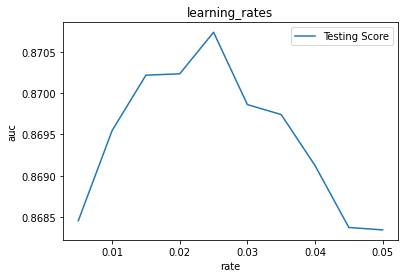

In [130]:
learning_rates = np.arange(1,11,1)
learning_rates = learning_rates/200.0
train_scores = []
test_scores = []
for learning_rate in learning_rates:
    lgbm = LGBMClassifier(is_unbalance = True,num_leaves=60,learning_rate=learning_rate,n_estimators=180)
    lgbm.fit(train_X,train_y)
    pre_y1 = lgbm.predict_proba(train_X)[:,1]
    pre_y2 = lgbm.predict_proba(test_X)[:,1]
    train_scores.append(roc_auc_score(train_y, pre_y1))
    test_scores.append(roc_auc_score(test_y, pre_y2))

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(learning_rates,train_scores,label='Training Score')
ax.plot(learning_rates,test_scores,label='Testing Score')
ax.set_xlabel(r'rate')
ax.set_ylabel(r'auc')
ax.set_title('learning_rates')
ax.legend(loc='best')
plt.show()

In [131]:
learning_rates [test_scores.index(max(test_scores))]

0.025

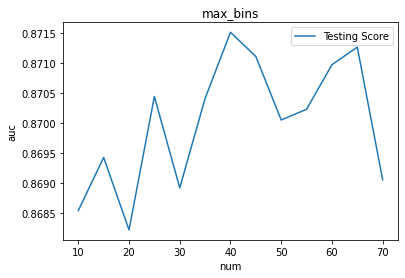

In [132]:
max_bins = range(10,71,5)
train_scores = []
test_scores = []
for max_bin in max_bins:
    lgbm = LGBMClassifier(is_unbalance = True,max_bin = max_bin,num_leaves=60,learning_rate=0.025,n_estimators=180)
    lgbm.fit(train_X,train_y)
    pre_y1 = lgbm.predict_proba(train_X)[:,1]
    pre_y2 = lgbm.predict_proba(test_X)[:,1]
    #train_scores.append(roc_auc_score(train_y, pre_y1))
    test_scores.append(roc_auc_score(test_y, pre_y2))

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(max_bins,train_scores,label='Training Score')
ax.plot(max_bins,test_scores,label='Testing Score')
ax.set_xlabel(r'num')
ax.set_ylabel(r'auc')
ax.set_title('max_bins')
ax.legend(loc='best')
plt.show()

In [133]:
max_bins[test_scores.index(max(test_scores))]

40

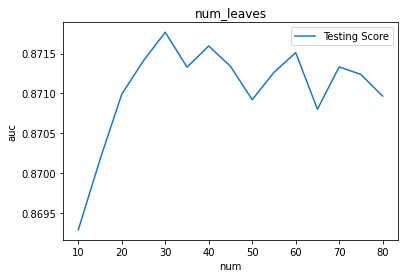

In [135]:
num_leaves = range(10,81,5)
#train_scores = []
test_scores = []
for num_leave in num_leaves:
    lgbm = LGBMClassifier(is_unbalance = True,num_leaves=num_leave,max_bin=40,learning_rate=0.025,n_estimators=180)
    lgbm.fit(train_X,train_y)
    pre_y1 = lgbm.predict_proba(train_X)[:,1]
    pre_y2 = lgbm.predict_proba(test_X)[:,1]
    #train_scores.append(roc_auc_score(train_y, pre_y1))
    test_scores.append(roc_auc_score(test_y, pre_y2))

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(num_leaves,train_scores,label='Training Score')
ax.plot(num_leaves,test_scores,label='Testing Score')
ax.set_xlabel(r'num')
ax.set_ylabel(r'auc')
ax.set_title('num_leaves')
ax.legend(loc='best')
plt.show()

In [136]:
num_leaves[test_scores.index(max(test_scores))]

30

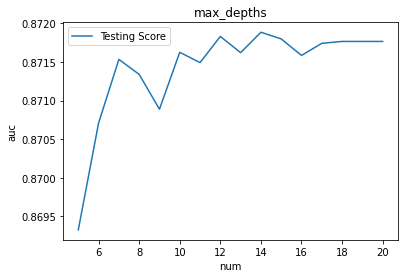

In [137]:
max_depths = range(5,21,1)
#train_scores = []
test_scores = []
for max_depth in max_depths:
    lgbm = LGBMClassifier(is_unbalance = True,max_depth=max_depth,num_leaves=30,max_bin=40,learning_rate=0.025,n_estimators=180)
    lgbm.fit(train_X,train_y)
    pre_y1 = lgbm.predict_proba(train_X)[:,1]
    pre_y2 = lgbm.predict_proba(test_X)[:,1]
    #train_scores.append(roc_auc_score(train_y, pre_y1))
    test_scores.append(roc_auc_score(test_y, pre_y2))

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(max_depths,train_scores,label='Training Score')
ax.plot(max_depths,test_scores,label='Testing Score')
ax.set_xlabel(r'num')
ax.set_ylabel(r'auc')
ax.set_title('max_depths')
ax.legend(loc='best')
plt.show()

In [138]:
max_depths[test_scores.index(max(test_scores))]

14

[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

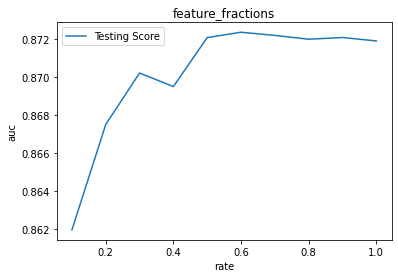

In [139]:
feature_fractions = np.arange(1,11,1)
feature_fractions = feature_fractions/10.0
#train_scores = []
test_scores = []
for feature_fraction in feature_fractions:
    lgbm = LGBMClassifier(is_unbalance = True,max_depth=14,num_leaves=30,max_bin=40,learning_rate=0.025,n_estimators=180,feature_fraction=feature_fraction)
    lgbm.fit(train_X,train_y)
    pre_y1 = lgbm.predict_proba(train_X)[:,1]
    pre_y2 = lgbm.predict_proba(test_X)[:,1]
    #train_scores.append(roc_auc_score(train_y, pre_y1))
    test_scores.append(roc_auc_score(test_y, pre_y2))

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(feature_fractions,train_scores,label='Training Score')
ax.plot(feature_fractions,test_scores,label='Testing Score')
ax.set_xlabel(r'rate')
ax.set_ylabel(r'auc')
ax.set_title('feature_fractions')
ax.legend(loc='best')
plt.show()

In [140]:
feature_fractions[test_scores.index(max(test_scores))]

0.6

In [141]:
lgbm = LGBMClassifier(is_unbalance = True,max_depth=14,num_leaves=30,max_bin=40,learning_rate=0.025,n_estimators=180,feature_fraction=0.6)
lgbm.fit(train_X,train_y)
pre_y = lgbm.predict_proba(test_X)[:,1]

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6


# 4. Result Comparison

In [142]:
test_df_x = test_df.iloc[:,2:]
pre_y2 = lgbm.predict_proba(test_df_x)[:,1]

In [143]:
result = pd.read_csv('/kaggle/input/GiveMeSomeCredit/sampleEntry.csv') 
result['Probability'] = pre_y2
result.to_csv('./submit.csv',index=False)
reload = pd.read_csv('./submit.csv')
reload

,Id,Probability
0,1,0.490472
1,2,0.309317
2,3,0.192502
3,4,0.517302
4,5,0.632581
...,...,...
101498,101499,0.259731
101499,101500,0.856383
101500,101501,0.056009
101501,101502,0.541680
